In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt # graphics package
import seaborn as sns
from IPython.display import display, HTML
from wordcloud import WordCloud, STOPWORDS

### Step:1 Reading The business data

In [3]:
b_data=pd.read_csv(r'E:\Masters\Machine Learning_MAN\NLP main project\yelps-Business.csv') #change the \ to /
b_data.head(3)
b_data.describe()

,latitude,longitude,stars,review_count,is_open
count,5829.000000,5829.000000,5829.000000,5829.000000,5829.0
mean,43.681757,-79.393060,3.465946,46.231086,1.0
std,0.046865,0.063406,0.757030,79.654142,0.0
min,43.589597,-79.703390,1.000000,3.000000,1.0
25%,43.650574,-79.419006,3.000000,7.000000,1.0
50%,43.664267,-79.392784,3.500000,18.000000,1.0
75%,43.700617,-79.371774,4.000000,52.000000,1.0
max,43.876501,-79.137178,5.000000,1494.000000,1.0


In [5]:
df = b_data[['stars', 'review_count']]
df.head()
df.tail()

,stars,review_count
5824,1.0,3
5825,1.0,4
5826,1.0,3
5827,1.0,3
5828,1.0,5


In [6]:
stars = b_data['stars']
review = b_data['review_count']
stars.head()

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: stars, dtype: float64

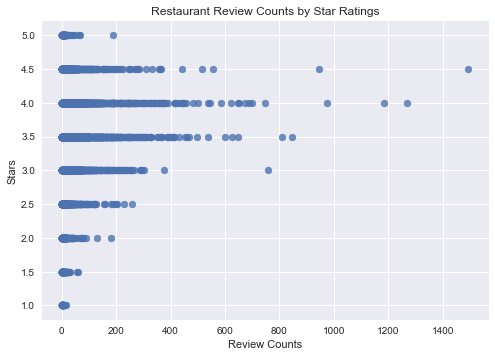

In [7]:
plt.scatter(review, stars, alpha=0.80)
plt.title('Restaurant Review Counts by Star Ratings')
plt.xlabel('Review Counts')
plt.ylabel('Stars')
plt.show()

In [9]:
b_data["stars"].unique()

array([ 5. ,  4.5,  4. ,  3.5,  3. ,  2.5,  2. ,  1.5,  1. ])

In [11]:
b_data['stars'].value_counts()

3.5    1531
4.0    1486
3.0    1099
4.5     643
2.5     531
2.0     267
5.0     130
1.5     113
1.0      29
Name: stars, dtype: int64

In [12]:
star_4 = b_data[b_data['stars'] == 4]
star_4_5 = b_data[b_data['stars'] == 4.5]
star_5 = b_data[b_data['stars'] == 5]

In [14]:
star_5.head(3)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,VDhLScy4FneNi9LcVOg-aQ,"""Shawarma Q""",Yonge and St. Clair,"""55 St Clair Avenue W""",Toronto,ON,M4V 2Y7,43.687206,-79.396635,5.0,3,1,Afghan;Restaurants;Middle Eastern
1,iYVHx6Yy1Ut8JjLY40eUyg,"""Patricia's Cake Creations""",Etobicoke,"""4130 Dundas Street W""",Toronto,ON,M8X 1X3,43.661918,-79.507272,5.0,10,1,Bakeries;Cafes;Food;Desserts;Restaurants
2,VKKC3SVIjrA6yf1OFLogvg,"""Cob's Bread""",The Danforth,"""156 Danforth Avenue""",Toronto,ON,M4K 1N1,43.676686,-79.357480,5.0,4,1,Bakeries;Food


In [16]:
data1 = b_data[b_data['review_count'] >= 600]
data1.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
393,r_BrIgzYcwo1NAuG9dLbpg,"""Pai Northern Thai Kitchen""",Entertainment District,"""18 Duncan Street""",Toronto,ON,M5H 3G8,43.647866,-79.388642,4.5,1494,1,Food;Ethnic Food;Specialty Food;Restaurants;Thai
503,iGEvDk6hsizigmXhDKs2Vg,"""Seven Lives Tacos Y Mariscos""",Kensington Market,"""69 Kensington Avenue""",Toronto,ON,M5T 2K2,43.654341,-79.400480,4.5,945,1,Mexican;Restaurants;Seafood
858,k6zmSLmYAquCpJGKNnTgSQ,"""The Stockyards""",Wychwood,"""699 Saint Clair Avenue W""",Toronto,ON,M6C 1B2,43.681346,-79.426147,4.0,646,1,Barbeque;Restaurants;American (Traditional);So...
1344,uAAWlLdsoUf872F1FKiX1A,"""Bang Bang Ice Cream and bakery""",Ossington Strip,"""93a Ossington Avenue""",Toronto,ON,M6J 2Z2,43.646286,-79.419474,4.0,746,1,Food;Desserts;Ice Cream & Frozen Yogurt
1472,B70iTJjcPkuYn8ouUewWgw,"""Gusto 101""",NaN,"""101 Portland Street""",Toronto,ON,M5V 2N3,43.645002,-79.400309,4.0,673,1,Italian;Restaurants


In [20]:
low_rating = b_data[b_data['stars'] <=3] 
low_rating.head(3)
low_rating[low_rating['stars'] ==2].count()
low_rating.isnull().any()

business_id     False
name            False
neighborhood     True
address         False
city            False
state           False
postal_code      True
latitude        False
longitude       False
stars           False
review_count    False
is_open         False
categories      False
dtype: bool

### Step:2 Reading The review data

In [19]:
r_data = pd.read_csv(r'E:\Masters\Machine Learning_MAN\NLP main project\yelp_review.csv')
r_data.head(5)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [21]:
r_data.tail(5)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
5261663,PoGSiNz1X5SUu0qEt-qM5w,mPjPyipaD0C_myqWqDipZg,Ngk84Ax1tXgpoJFEGxot3w,1,2011-11-21,"Bought groupon $39 for 4 months from groupon, ...",36,3,3
5261664,-CJNPrDWgIkorx4iEZJXIg,mPjPyipaD0C_myqWqDipZg,pOEL97ld-FJMKO8Ki8JmYg,3,2016-04-30,"Spring rolls was pretty good, cod was a bit ra...",0,0,0
5261665,W9eVvOcpBvG6lpJPoJOxuA,mPjPyipaD0C_myqWqDipZg,5ubokMNw8qfbX2WtxgJG1Q,4,2011-10-23,"Had a 8 dish set meal, was enough for 10 peopl...",3,0,1
5261666,hqQ1UTFKMN2P1ezUow48OQ,mPjPyipaD0C_myqWqDipZg,EO3i5kTUG7_S2OIQ23sdSA,3,2011-11-07,"A small, cozy family run Authentic korean rest...",2,0,0
5261667,ldsIs3sGXPJ7WM7VyAm4lQ,mPjPyipaD0C_myqWqDipZg,HloEEXm_QzEpycuwA_RtQA,3,2011-11-15,Really nice atmosphere and settings and very c...,0,1,1


### Step:3
### 3 star review  restaurant  data extraction 
#### Name : Momofuku Noodle Bar
#### Type : American (New);Ramen;Asian Fusion;Restaurants;Chinese;Soup;Japanese;Korean

In [104]:

asian = r_data[r_data['business_id'] =="zgQHtqX0gqMw1nlBZl2VnQ"]
asian.count()
asian = asian.reset_index(drop = True)
asian.tail()
asian.iloc[0]
asian.head(3)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,1,2012-10-30,really excited to hear of this restaurant comi...,9,2,1
1,f17tpJXCwTE0M137d9yX6g,nOTl4aPC4tKHK35T3bNauQ,zgQHtqX0gqMw1nlBZl2VnQ,2,2013-10-19,"While I really enjoyed the noodles, their sign...",2,1,0
2,3caH15-vEZm-yDGTMM-2sQ,xYciRtVZ1PW4IxSX4oJ1aw,zgQHtqX0gqMw1nlBZl2VnQ,1,2015-04-03,"My review is only for the Noodle Bar, I would ...",2,1,0


### Step:4 Using nltk library preprocessing the review text fields

In [105]:
#cleaning the texts
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

corpus = []
for i in range(0,760):
    review = re.sub('[^a-zA-Z]', ' ', asian['text'][i]) ##keeping the words only
    #print(review)
    review = review.lower()   ##transforming to lowercase
    #print(review)
    review = review.split()
    print(review)
    ps     = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] ##stemming the review words
    review = ' '.join(review)
    corpus.append(review)
print(corpus[0]) 


['really', 'excited', 'to', 'hear', 'of', 'this', 'restaurant', 'coming', 'to', 'toronto', 'when', 'it', 'finally', 'opened', 'my', 'friend', 'and', 'i', 'were', 'really', 'excited', 'to', 'try', 'this', 'place', 'service', 'here', 'is', 'not', 'great', 'it', 'felt', 'like', 'they', 'had', 'forgotten', 'about', 'us', 'and', 'that', 'they', 'didn', 't', 'care', 'about', 'the', 'service', 'as', 'everything', 'came', 'out', 'one', 'at', 'a', 'time', 'my', 'friend', 'and', 'i', 'had', 'each', 'ordered', 'a', 'ginger', 'beer', 'which', 'came', 'out', 'at', 'two', 'separate', 'times', 'it', 'was', 'almost', 'as', 'if', 'they', 'had', 'to', 'go', 'in', 'the', 'back', 'and', 'make', 'it', 'themselves', 'that', 's', 'how', 'long', 'it', 'took', 'there', 'is', 'absolutely', 'no', 'vegetarian', 'options', 'except', 'for', 'the', 'one', 'cold', 'noodle', 'the', 'mushroom', 'bun', 'is', 'not', 'vegetarian', 'the', 'pork', 'belly', 'bun', 'was', 'nothing', 'special', 'just', 'a', 'piece', 'of', 'mea

### Step:5 Separate the review column for sentiment analysis

In [106]:
clean= pd.DataFrame(np.array(corpus), columns=['text'])
clean.head()
#asian.head()

,text
0,realli excit hear restaur come toronto final o...
1,realli enjoy noodl signatur pork bun seem some...
2,review noodl bar would probabl come momofuku d...
3,everyth menu delici side side seat great chat ...
4,noth special ramen mediocr compost cooki milk ...


### Step:6 Sentiment analysis using TextBlob library

In [107]:
# getting the sentiment analysis
def get_label(analysis, threshold = 0):
    print(analysis.sentiment)
    if analysis.sentiment.polarity > 0:
            return 'positive'
    elif analysis.sentiment.polarity == 0:
            return 'neutral'
    else:
            return 'negative'
asian["sentiment"] = clean['text'].apply(lambda review: get_label(TextBlob(review)))  # appending the sentiment to the dataframe

Sentiment(polarity=0.047069597069597076, subjectivity=0.5565934065934065)
Sentiment(polarity=0.19501133786848074, subjectivity=0.4505102040816326)
Sentiment(polarity=0.06677489177489176, subjectivity=0.4372294372294372)
Sentiment(polarity=0.4916666666666667, subjectivity=0.625)
Sentiment(polarity=0.3523809523809524, subjectivity=0.3904761904761905)
Sentiment(polarity=-0.039999999999999994, subjectivity=0.58)
Sentiment(polarity=0.24856681779758702, subjectivity=0.5551821042205657)
Sentiment(polarity=0.4333333333333333, subjectivity=0.7333333333333333)
Sentiment(polarity=0.5944444444444444, subjectivity=0.6972222222222223)
Sentiment(polarity=0.2492177937005523, subjectivity=0.4618883415435139)
Sentiment(polarity=-0.04960317460317461, subjectivity=0.6209435626102291)
Sentiment(polarity=0.19591269841269834, subjectivity=0.5238166463166465)
Sentiment(polarity=0.08935574229691877, subjectivity=0.5741596638655463)
Sentiment(polarity=0.29999999999999993, subjectivity=0.3101190476190476)
Sentim

### Step:7
### 1 star review  restaurant  data extraction 
#### Name : Sbarro
#### Type : Restaurants;Italian;Fast Food;Food Court;Pizza

In [108]:
italian = r_data[r_data['business_id'] =="AyuE2AyyKSZj97SNLAHM9w"]
italian.stars.count()
italian.iloc[0]
italian[ :3]
italian.iloc[0]
italian = italian.reset_index(drop = True)
italian.head(3)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,MW2bnPXpZ4QK2lKX1xU4lw,SRA86Xyf9fbOAhICWttMLQ,AyuE2AyyKSZj97SNLAHM9w,4,2013-12-01,"For a Saturday evening, the service at Sbarro ...",0,0,0
1,JVuldryLxILr0Aj1b3wWCA,7FhKf2tuC8HUUFm5tPiqgA,AyuE2AyyKSZj97SNLAHM9w,1,2016-08-13,This was my first experience with Sbarro. Will...,1,0,0
2,7kbimvdKhqRutx4bk5pAWA,AuTgb6rJsT5J70hPJSTIeQ,AyuE2AyyKSZj97SNLAHM9w,1,2013-11-19,"If you like to eat cardboard instead of pizza,...",4,0,0


## Step:8 Doing the analysis using functions
#### ( this basically repetition of step 4 and 6  using function for convinience)

In [109]:
def clean(data,maxi):
    corpus = []
    for i in range(0,maxi):
        review = re.sub('[^a-zA-Z]', ' ', data['text'][i]) #removing the unncessary punctiation marks.
        review = review.lower() #transforming the letters in lowercase
        review = review.split() #splitting the words as a past of tokenizing
        ps     = PorterStemmer()
        lem    = WordNetLemmatizer()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] #Steming and removing unwanted words
        review = ' '.join(review) 
        corpus.append(review)
    print(corpus[0]) 
    print("\n=>original review: " , data['text'][0])
    clear = pd.DataFrame(np.array(corpus), columns=['text'])
    clear.head()
    return clear

                                                                                               
# getting the sentiment analysis
def get_label(analysis, threshold = 0):
    print(analysis.sentiment)
    if analysis.sentiment.polarity > 0:
            return 'positive'
    elif analysis.sentiment.polarity == 0:
            return 'neutral'
    else:
            return 'negative'


    

### Step:9 Sentiment analysis for the 1 star restaurant

In [110]:
res = clean(italian,15)                                                
res.head()

italian["sentiment"] = res['text'].apply(lambda review: get_label(TextBlob(review)))
italian.head()

print("\nnegative review count\n",italian[italian['sentiment']=='negative'].count()) 
print("\npositive review count\n",italian[italian['sentiment']=='positive'].count())

#psoitive review sbtract negative review
res = 10 - 5
print("we have ",res," more positve review for the 'Sbarro' than negative")

saturday even servic sbarro pretti quick server took order heat pepperoni chees stromboli right away scoop salad fill drink pretti good select pizza stuf pizza kind stromboli pepperoni chees stromboli amaz good pepperoni chees bread ratio salti went back tri broccoli chicken chees stromboli noth like pepperoni chees even bother

=>original review:  For a Saturday evening, the service at Sbarro was pretty quick. The server took my order and heated up my pepperoni and cheese stromboli right away, as she scooped my salad and filled my drink.

There was a pretty good selection of pizzas, stuffed pizzas and 2 other kinds of stromboli. 

The pepperoni and cheese stromboli is amazing. It was a good pepperoni to cheese to bread ratio, and it was not too salty.

We went back to try the broccoli, chicken and cheese stromboli but that was nothing like the pepperoni and cheese. Don't even bother.
Sentiment(polarity=0.2884353741496598, subjectivity=0.5836734693877551)
Sentiment(polarity=0.110000000

In [111]:
res = clean(italian,15)                                                
res.head()

italian["sentiment"] = res['text'].apply(lambda review: get_label(TextBlob(review)))
italian.head()


saturday even servic sbarro pretti quick server took order heat pepperoni chees stromboli right away scoop salad fill drink pretti good select pizza stuf pizza kind stromboli pepperoni chees stromboli amaz good pepperoni chees bread ratio salti went back tri broccoli chicken chees stromboli noth like pepperoni chees even bother

=>original review:  For a Saturday evening, the service at Sbarro was pretty quick. The server took my order and heated up my pepperoni and cheese stromboli right away, as she scooped my salad and filled my drink.

There was a pretty good selection of pizzas, stuffed pizzas and 2 other kinds of stromboli. 

The pepperoni and cheese stromboli is amazing. It was a good pepperoni to cheese to bread ratio, and it was not too salty.

We went back to try the broccoli, chicken and cheese stromboli but that was nothing like the pepperoni and cheese. Don't even bother.
Sentiment(polarity=0.2884353741496598, subjectivity=0.5836734693877551)
Sentiment(polarity=0.110000000

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,sentiment
0,MW2bnPXpZ4QK2lKX1xU4lw,SRA86Xyf9fbOAhICWttMLQ,AyuE2AyyKSZj97SNLAHM9w,4,2013-12-01,"For a Saturday evening, the service at Sbarro ...",0,0,0,positive
1,JVuldryLxILr0Aj1b3wWCA,7FhKf2tuC8HUUFm5tPiqgA,AyuE2AyyKSZj97SNLAHM9w,1,2016-08-13,This was my first experience with Sbarro. Will...,1,0,0,positive
2,7kbimvdKhqRutx4bk5pAWA,AuTgb6rJsT5J70hPJSTIeQ,AyuE2AyyKSZj97SNLAHM9w,1,2013-11-19,"If you like to eat cardboard instead of pizza,...",4,0,0,negative
3,UK-_cLF5jaQoZ0CEsgMrlA,MLe-x4FDHPeDFmaSx7L-aQ,AyuE2AyyKSZj97SNLAHM9w,1,2017-05-04,"Yeah, this was pretty bad and a waste of as st...",0,0,0,positive
4,t3u_WnApMh4Ksly8WTO72g,fHdNrSQhhkCF4Pq1nWnMyA,AyuE2AyyKSZj97SNLAHM9w,1,2016-01-09,"Did not enjoy my experience here at all. Yes, ...",2,0,0,positive


### Step:10 
### 2 star review  restaurant  data extraction 
#### Name : Wahlburgers
#### Burgers;Sports Bars;Nightlife;Fast Food;Bars;Sandwiches;American (Traditional);Restaurant

In [112]:
#Burgers;Sports Bars;Nightlife;Fast Food;Bars;Sandwiches;American (Traditional);Restaurants    "Wahlburgers"   avg-2.5
burg = r_data[r_data['business_id'] =="xFkUn2tIJY0vkcm1Hl5m_A"]
burg.stars.count()
burg = burg.reset_index(drop = True)
burg.head(15)
burg.tail()
burg.head(3)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,Y86_1k446dBK9VoHm7okLg,xYciRtVZ1PW4IxSX4oJ1aw,xFkUn2tIJY0vkcm1Hl5m_A,1,2016-05-08,"I got the ""Our Burger"" for take out - which if...",7,3,0
1,vIOhUe9gi_4wv-UCd2RQ-Q,UByCy7oxeiqFKOLmGUVm3g,xFkUn2tIJY0vkcm1Hl5m_A,3,2016-05-01,Let's preface this with the fact that burgers ...,1,0,0
2,8AHqngF2N750lxwRvMRpXA,5QlJcroZyTs4AUFZoCNg0Q,xFkUn2tIJY0vkcm1Hl5m_A,4,2015-08-25,On our way to the Blue Jays game my friend Bob...,3,1,3


### Step:11 Sentiment analysis for 2 star restaurant

In [113]:
res = clean(burg,259)                                                
res.head()

burg["sentiment"] = res['text'].apply(lambda review: get_label(TextBlob(review)))
burg.head()


got burger take rememb correctli consist lettuc tomato pickl patti sauc call burger joint eff patti overcook differ medium cook still juici vs overcook dri af thing happen cowork well happen go back

=>original review:  I got the "Our Burger" for take out - which if I remember correctly it consisted of lettuce, tomato, pickles, patty and some sauce....

How can you call yourself a burger joint when you eff up the patty?!! It was OVERCOOKED, there's a difference between medium cooked and still juicy vs OVERCOOKED and dry af. The same thing happened to 2 of my other coworkers as well so it didn't happen to just me. Not going back!
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.24444444444444446, subjectivity=0.4000000000000001)
Sentiment(polarity=0.10238095238095239, subjectivity=0.39047619047619053)
Sentiment(polarity=0.2089285714285714, subjectivity=0.3630952380952381)
Sentiment(polarity=-0.0833333333333333, subjectivity=0.29666666666666663)
Sentiment(polarity=0.1334166

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,sentiment
0,Y86_1k446dBK9VoHm7okLg,xYciRtVZ1PW4IxSX4oJ1aw,xFkUn2tIJY0vkcm1Hl5m_A,1,2016-05-08,"I got the ""Our Burger"" for take out - which if...",7,3,0,neutral
1,vIOhUe9gi_4wv-UCd2RQ-Q,UByCy7oxeiqFKOLmGUVm3g,xFkUn2tIJY0vkcm1Hl5m_A,3,2016-05-01,Let's preface this with the fact that burgers ...,1,0,0,positive
2,8AHqngF2N750lxwRvMRpXA,5QlJcroZyTs4AUFZoCNg0Q,xFkUn2tIJY0vkcm1Hl5m_A,4,2015-08-25,On our way to the Blue Jays game my friend Bob...,3,1,3,positive
3,vdzlrFFEkkuq0NsgUFRCFg,IbwI369hSb9lkdWPeAYmgw,xFkUn2tIJY0vkcm1Hl5m_A,3,2015-01-28,Mediocre burgers that come with quite the pric...,4,0,0,positive
4,tBkvmAYKUuWdCgbBn_VbNQ,7kr07YT8aajBy3NG9R-5pg,xFkUn2tIJY0vkcm1Hl5m_A,1,2016-08-20,Just grabbed take out because my boyfriend was...,2,0,0,negative


### Step:12 Word Cloud for the Asian Fusion restaurant

In [114]:
positives = asian[asian['sentiment'] == 'positive']
positives.text
negative = asian[asian['sentiment'] == 'negative']
positives.text

0      really excited to hear of this restaurant comi...
1      While I really enjoyed the noodles, their sign...
2      My review is only for the Noodle Bar, I would ...
3      Everything on the menu was delicious! The side...
4      It's nothing special, the ramen is very medioc...
6      Finally came here after much anticipation! I w...
7      Underwhelmed. Had shiitake buns and scallion n...
8      It was a pleasant experience, their interiors ...
9      I just recently relocated from NYC to Toronto....
11     So you watch Mind of Chef and you see how Chef...
12     Momofuku Noodle Bar is located in a glass cube...
13     Another visit, another transcendent bowl of ra...
14     I was anticipating an amazing meal however Mom...
15     2nd time here... Slightly less disappointed th...
16     Went there for lunch on a work day with my mot...
17     I think part of the reason why the rating for ...
18     I really wasn't expecting to be able to get in...
19     It has arrived at long l

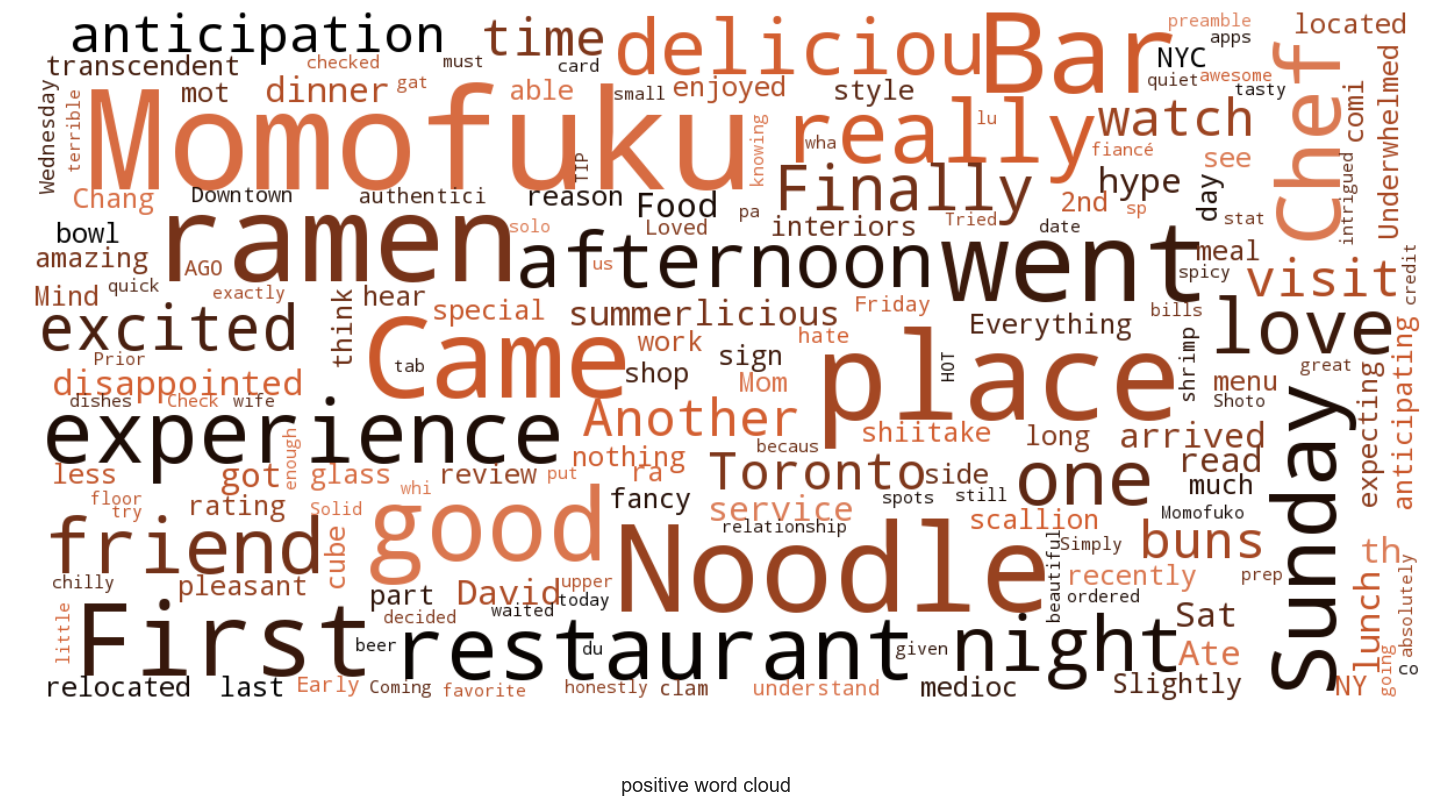

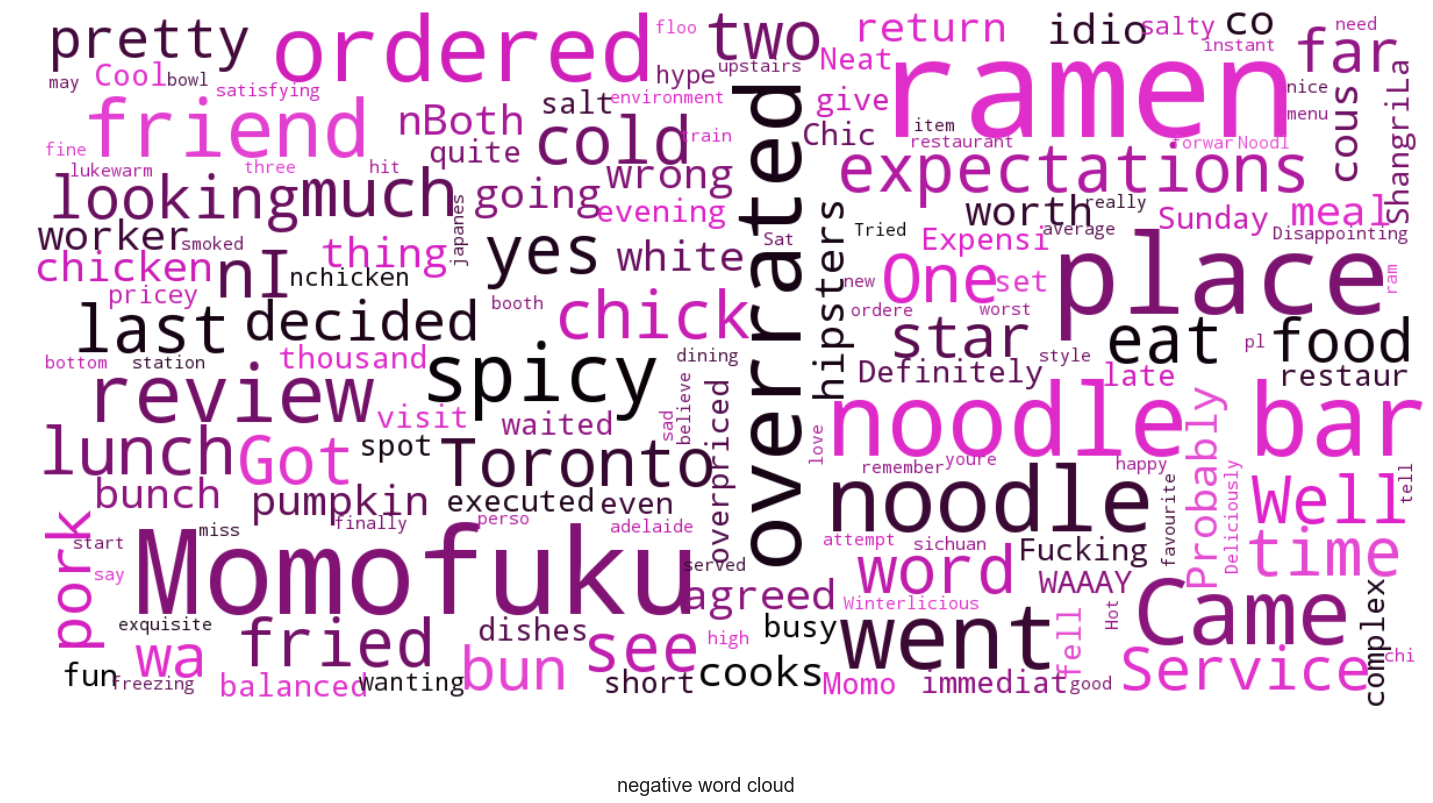

In [115]:
import random

stopwords = set(STOPWORDS)

def grey_color_pos(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(17, 65%%, %d%%)" % random.randint(0, 60)    #hsla(17, 65%, 47%, 0.93)

def grey_color_neg(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(307, 74%%, %d%%)" % random.randint(0, 60)    #hsla(17, 65%, 47%, 0.93)

def show_wordcloud(data,color,caption):
    title = caption
    wordcloud = WordCloud(
        background_color="white",
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(25, 25))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.imshow(wordcloud.recolor(color_func=color, random_state=3),
           interpolation="bilinear")
    plt.show()


title = "positive word cloud"
title2= "negative word cloud"
show_wordcloud(positives.text,grey_color_pos, title)
print("\n\n")
show_wordcloud(negative.text, grey_color_neg, title2)


### Step:13 Analysing the sentiments

In [116]:
# Asian fusion restaurant
print("\nnegative review count\n",asian[asian['sentiment']=='negative'].count())
print("\npositive review count\n",asian[asian['sentiment']=='positive'].count())

#positive review subtract negative review
res = 625 - 93
print("we have ",res," more positve review for the 'Momofuku Noodle Bar' than negative")


negative review count
 review_id      93
user_id        93
business_id    93
stars          93
date           93
text           93
useful         93
funny          93
cool           93
sentiment      93
dtype: int64

positive review count
 review_id      652
user_id        652
business_id    652
stars          652
date           652
text           652
useful         652
funny          652
cool           652
sentiment      652
dtype: int64
we have  532  more positve review for the 'Momofuku Noodle Bar' than negative


In [117]:
#Italian Restaurant
print("\nnegative review count\n",italian[italian['sentiment']=='negative'].count()) 
print("\npositive review count\n",italian[italian['sentiment']=='positive'].count())

#positive review subtract negative review
res = 10 - 5
print("we have ",res," more positve review for the 'Sbarro' than negative")


negative review count
 review_id      5
user_id        5
business_id    5
stars          5
date           5
text           5
useful         5
funny          5
cool           5
sentiment      5
dtype: int64

positive review count
 review_id      10
user_id        10
business_id    10
stars          10
date           10
text           10
useful         10
funny          10
cool           10
sentiment      10
dtype: int64
we have  5  more positve review for the 'Sbarro' than negative


In [118]:
#The burger joint
print("\nnegative review count\n",burg[burg['sentiment']=='negative'].count())
print("\npositive review count\n",burg[burg['sentiment']=='positive'].count())

#psoitive review sbtract negative review
res = 228 - 25
print("we have ",res," more positve review for the 'Wahlburgers' than negative")


negative review count
 review_id      25
user_id        25
business_id    25
stars          25
date           25
text           25
useful         25
funny          25
cool           25
sentiment      25
dtype: int64

positive review count
 review_id      228
user_id        228
business_id    228
stars          228
date           228
text           228
useful         228
funny          228
cool           228
sentiment      228
dtype: int64
we have  203  more positve review for the 'Wahlburgers' than negative


In [119]:
# Extracting the date and month from the dataframe
def date_extractor(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'], df['month']= df['date'].dt.year, df['date'].dt.month

date_extractor(asian)  
date_extractor(italian)  
date_extractor(burg)  

In [121]:
asian.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,sentiment,year,month
0,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,1,2012-10-30,really excited to hear of this restaurant comi...,9,2,1,positive,2012,10
1,f17tpJXCwTE0M137d9yX6g,nOTl4aPC4tKHK35T3bNauQ,zgQHtqX0gqMw1nlBZl2VnQ,2,2013-10-19,"While I really enjoyed the noodles, their sign...",2,1,0,positive,2013,10
2,3caH15-vEZm-yDGTMM-2sQ,xYciRtVZ1PW4IxSX4oJ1aw,zgQHtqX0gqMw1nlBZl2VnQ,1,2015-04-03,"My review is only for the Noodle Bar, I would ...",2,1,0,positive,2015,4
3,gNGlJMcj_QR0yxHUGjX3lw,JjRelLkHLVtYQO7JYvbCJQ,zgQHtqX0gqMw1nlBZl2VnQ,4,2015-08-29,Everything on the menu was delicious! The side...,0,0,0,positive,2015,8
4,BPAsFw0HNyaqYYUd3P1TIA,JoxK3Kyr7p-HnHcylBr-Dw,zgQHtqX0gqMw1nlBZl2VnQ,3,2016-01-23,"It's nothing special, the ramen is very medioc...",0,0,0,positive,2016,1


KeyError: ('sentiment', 'month')